In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
import os
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import OneHotEncoder
import future 
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
seed = 100
np.random.seed(seed)
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Input
import pandas as pd
from tensorflow.keras.models import load_model

C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [2]:
from sklearn.preprocessing import MultiLabelBinarizer                                 

#  原本6種 + 3 mix修圖 + 重疊的+incv3--60

In [ ]:
# 先讀第一個

In [3]:
path=os.getcwd()+'\\DATA\\picture_mix_train' #只有單一修圖 6種///的資料夾
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    read_images.append(img)
read_images = np.array(read_images)
print ('Images are all in read_images')     
print(read_images.shape) 

###########################################################################################################

x1 = read_images
#split = np.random.choice(40000,8000,replace=False)

y1 = np.array(np.repeat(range(1,7),5000).reshape(-1,1))
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.20, random_state=seed,shuffle=True) 
x1_test = x1_test.reshape(x1_test.shape[0],100,100,1)
x1_train = x1_train.reshape(x1_train.shape[0],100,100,1)

print('Shape of x1_train is (%d,%d,%d,%d)'%(x1_train.shape))
print('Shape of x1_test is (%d,%d,%d,%d)'%(x1_test.shape))
print('Shape of y1_train is (%d,%d)'%(y1_train.shape))
print('Shape of y1_test is (%d,%d)'%(y1_test.shape))
onehot = OneHotEncoder()

y1_train = onehot.fit_transform(y1_train).toarray()
y1_test_ori = y1_test
y1_test = onehot.fit_transform(y1_test).toarray()
print('Shape of y1_train is (%d,%d)'%(y1_train.shape))


Images are all in read_images
(30000, 100, 100)
Shape of x1_train is (24000,100,100,1)
Shape of x1_test is (6000,100,100,1)
Shape of y1_train is (24000,1)
Shape of y1_test is (6000,1)
Shape of y1_train is (24000,6)


In [4]:
path='C:\\Users\\user\\Desktop\\project\\picture_mix_train_2'  # 3個 mix 的資料夾 一半一半
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    read_images.append(img)
read_images = np.array(read_images)
print ('Images are all in read_images')     
print(read_images.shape) 

###########################################################################################################

x2 = read_images
#split = np.random.choice(40000,8000,replace=False)

y2 = np.array(np.repeat(range(7,10),5000).reshape(-1,1))
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.20, random_state=seed,shuffle=True) 
x2_test = x2_test.reshape(x2_test.shape[0],100,100,1)
x2_train = x2_train.reshape(x2_train.shape[0],100,100,1)

print('Shape of x2_train is (%d,%d,%d,%d)'%(x2_train.shape))
print('Shape of x2_test is (%d,%d,%d,%d)'%(x2_test.shape))
print('Shape of y2_train is (%d,%d)'%(y2_train.shape))
print('Shape of y2_test is (%d,%d)'%(y2_test.shape))
#onehot = OneHotEncoder()

#y1_train = onehot.fit_transform(y1_train).toarray()
y2_test_ori = y2_test
y2_train_ori = y2_train



y2_test= np.arange(18000).reshape(3000, 6)
y2_train= np.arange(72000).reshape(12000, 6)


for i in range(0,len(y2_test_ori)):
    
    if y2_test_ori[i]==7:
        y2_test[i]=np.array([1,1,0,0,0,0]) 
    elif y2_test_ori[i]==8:
        y2_test[i]=np.array([0,0,1,1,0,0]) 
    else:
        y2_test[i]=np.array([0,0,0,1,1,0]) 
   

for j in range(0,len(y2_train_ori)):
    
    if y2_train_ori[j]==7:
        y2_train[j]=np.array([1,1,0,0,0,0]) 
    elif y2_train_ori[j]==8:
        y2_train[j]=np.array([0,0,1,1,0,0]) 
    else:
        y2_train[j]=np.array([0,0,0,1,1,0]) 




Images are all in read_images
(15000, 100, 100)
Shape of x2_train is (12000,100,100,1)
Shape of x2_test is (3000,100,100,1)
Shape of y2_train is (12000,1)
Shape of y2_test is (3000,1)


# 合併

In [5]:
x_train=np.vstack((x1_train,x2_train))
x_test=np.vstack((x1_test,x2_test))

y_train=np.vstack((y1_train,y2_train))
y_test=np.vstack((y1_test,y2_test))
y_test_ori=np.vstack((y1_test_ori,y2_test_ori))
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_test_ori.shape)



(36000, 100, 100, 1)
(9000, 100, 100, 1)
(36000, 6)
(9000, 6)
(9000, 1)


In [ ]:
#  train

In [9]:
import glob
import pickle
import matplotlib.pyplot as plt
dirpath=r'C:\Users\user\Desktop\project\inceptionv3_picture_mix\EPOCH\history\*.*' #train_history資料夾
filename=glob.glob(dirpath)
filename

['C:\\Users\\user\\Desktop\\project\\inceptionv3_picture_mix\\EPOCH\\history\\train_history_10.lst',
 'C:\\Users\\user\\Desktop\\project\\inceptionv3_picture_mix\\EPOCH\\history\\train_history_20.lst',
 'C:\\Users\\user\\Desktop\\project\\inceptionv3_picture_mix\\EPOCH\\history\\train_history_30.lst',
 'C:\\Users\\user\\Desktop\\project\\inceptionv3_picture_mix\\EPOCH\\history\\train_history_50.lst',
 'C:\\Users\\user\\Desktop\\project\\inceptionv3_picture_mix\\EPOCH\\history\\train_history_60.lst',
 'C:\\Users\\user\\Desktop\\project\\inceptionv3_picture_mix\\EPOCH\\history\\train_history_80.lst']

In [14]:
# 50
# 紀錄10次train/val的 acc/loss 最高/低 平均
#這裡都不用改喔


for i in range(0,6):
    with open(file=filename[i],mode="rb") as inhis :  
        a = pickle.load(file=inhis)                
        print(max(a['acc']))
        print(min(a['loss']))
        print(max(a['val_acc']))
        print(min(a['val_loss']))                                        
        
        





0.9781354
0.05516212617180177
0.9612348
0.09802016286110436
0.9910053
0.023871493579021522
0.97662044
0.08771475884649489
0.9955027
0.01223180222820254
0.98148155
0.05454331524670124
0.998307
0.004632255381621358
0.9831636
0.0502477909679766
0.9986111
0.004200228294604809
0.98655844
0.05109048872039205
0.9993119
0.0023210545753716448
0.9820988
0.06021263682352448


In [ ]:
# test

In [23]:
dirpath1=r'C:\Users\user\Desktop\project\inceptionv3_picture_mix\EPOCH\*.*' 
filename2=glob.glob(dirpath1)

test_acc=[]
test_loss=[]

filename2

['C:\\Users\\user\\Desktop\\project\\inceptionv3_picture_mix\\EPOCH\\model_iter10.hdf5',
 'C:\\Users\\user\\Desktop\\project\\inceptionv3_picture_mix\\EPOCH\\model_iter20.hdf5',
 'C:\\Users\\user\\Desktop\\project\\inceptionv3_picture_mix\\EPOCH\\model_iter30.hdf5',
 'C:\\Users\\user\\Desktop\\project\\inceptionv3_picture_mix\\EPOCH\\model_iter50.hdf5',
 'C:\\Users\\user\\Desktop\\project\\inceptionv3_picture_mix\\EPOCH\\model_iter60.hdf5',
 'C:\\Users\\user\\Desktop\\project\\inceptionv3_picture_mix\\EPOCH\\model_iter80.hdf5']

In [25]:
for i in range(0,6):
    
    tf.keras.backend.clear_session()
    model=load_model(filename2[i])
    model.evaluate(x=x_test,y=y_test)

9000/9000 [==============================] - 6s 644us/sample - loss: 0.1508 - acc: 0.9748


In [20]:
dirpath1=r'C:\Users\user\Desktop\project\inceptionv3_picture_mix\EPOCH\*.*' 
filename2=glob.glob(dirpath1)
for i in range(0,6):
    
    tf.keras.backend.clear_session()
    model=load_model(filename2[i])
    predict=model.predict(x_test) 
    # 算accuracy
#  epoch= 60
    y_test_ori=np.vstack((y1_test_ori,y2_test_ori))
    y_test_ori=pd.DataFrame(y_test_ori)
    y_test_ori=y_test_ori.rename(columns={0:'truelabel'})

    y_test_ori['true01']=np.where(y_test_ori['truelabel']==1,1,np.where(y_test_ori['truelabel']==2,2,np.where(y_test_ori['truelabel']==3,3,np.where(y_test_ori['truelabel']==4,4,
    np.where(y_test_ori['truelabel']==5,5,np.where(y_test_ori['truelabel']==6,6,np.where(y_test_ori['truelabel']==7,1,np.where(y_test_ori['truelabel']==8,3,4))))))))

    y_test_ori['true02']=np.where(y_test_ori['truelabel']==1,0,np.where(y_test_ori['truelabel']==2,0,np.where(y_test_ori['truelabel']==3,0,np.where(y_test_ori['truelabel']==4,0,
    np.where(y_test_ori['truelabel']==5,0,np.where(y_test_ori['truelabel']==6,0,np.where(y_test_ori['truelabel']==7,2,np.where(y_test_ori['truelabel']==8,4,5))))))))

    a=pd.DataFrame(predict)
    a=a.rename(columns={0:1, 1:2,2:3,3:4,4:5,5:6})

    a['max_value']=0
    a['second_large_value']=0 #值


    a['max']=0
    a['second_large']=0   # label


    for i in range(0,(a.shape[0])):
        tmp_list=0
        num_list=a.iloc[i,0:6]
        tmp_list=sorted(num_list)

        a['max_value'].iloc[i]=tmp_list[-1]
        p=np.where(num_list==tmp_list[-1])[0][-1]+1
        a['max'].iloc[i]=p    
    for i in range(0,(a.shape[0])):
        tmp_list=0
        num_list=a.iloc[i,0:6]
        tmp_list=sorted(num_list)
        a['second_large_value'].iloc[i]=tmp_list[-2]

        if a['second_large_value'].iloc[i]>=0.5:

            a['second_large'].iloc[i]=np.where(num_list==tmp_list[-2])[0][0]+1
        else:
            a['second_large'].iloc[i]=0
    b = pd.merge(y_test_ori, a, how='left',on=y_test_ori.index)
    b['acc']=0

    for i in range(0,(b.shape[0])):

        con1=[str(b['true01'][i]),str(b['true02'][i])]
        con1=sorted(con1)
        con2=[str(b['max'][i]),str(b['second_large'][i])]
        con2=sorted(con2)

        b['acc'].iloc[i]=np.where(con1==con2,1,0)
    print(b['acc'].sum()/9000)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


8085


C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


8007


C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


8266


C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


8532


C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


8454


C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


8358


In [13]:
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix
model_inv3_mix_60=load_model(r"C:\Users\user\Desktop\project\final_model\inceptionv3_picture_mix\model_iter60_1h.hdf5")


In [16]:
preds=model_inv3_mix_60.predict(x_test)   
preds[preds>=0.5] = 1
preds[preds<0.5] = 0

In [18]:
preds

array([[0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.]], dtype=float32)

In [19]:
y_test

array([[0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.]])

In [25]:
multilabel_confusion_matrix(y_test,preds)

array([[[7004,   13],
        [  81, 1902]],

       [[6904,   69],
        [ 117, 1910]],

       [[6966,   53],
        [ 168, 1813]],

       [[5675,  324],
        [ 109, 2892]],

       [[6959,    1],
        [   0, 2040]],

       [[7896,  136],
        [ 322,  646]]], dtype=int64)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000274BBD72708>]],
      dtype=object)

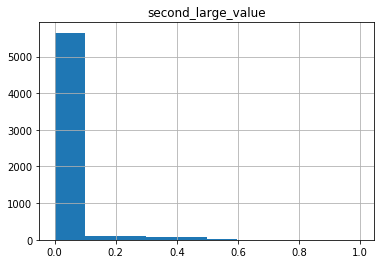

In [11]:
b[0:6000].hist(column="second_large_value")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027674B4BB88>]],
      dtype=object)

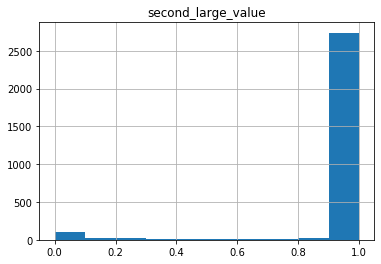

In [39]:
b[6001:8999].hist(column="second_large_value")

In [7]:
# 算accuracy
#  epoch= 60

y_test_ori=pd.DataFrame(y_test_ori)
y_test_ori=y_test_ori.rename(columns={0:'truelabel'})

y_test_ori['true01']=np.where(y_test_ori['truelabel']==1,1,np.where(y_test_ori['truelabel']==2,2,np.where(y_test_ori['truelabel']==3,3,np.where(y_test_ori['truelabel']==4,4,
np.where(y_test_ori['truelabel']==5,5,np.where(y_test_ori['truelabel']==6,6,np.where(y_test_ori['truelabel']==7,1,np.where(y_test_ori['truelabel']==8,3,4))))))))

y_test_ori['true02']=np.where(y_test_ori['truelabel']==1,0,np.where(y_test_ori['truelabel']==2,0,np.where(y_test_ori['truelabel']==3,0,np.where(y_test_ori['truelabel']==4,0,
np.where(y_test_ori['truelabel']==5,0,np.where(y_test_ori['truelabel']==6,0,np.where(y_test_ori['truelabel']==7,2,np.where(y_test_ori['truelabel']==8,4,5))))))))
                                                                                           
a=pd.DataFrame(predict)
a=a.rename(columns={0:1, 1:2,2:3,3:4,4:5,5:6})

a['max_value']=0
a['second_large_value']=0 #值
   

a['max']=0
a['second_large']=0   # label
     
    
for i in range(0,(a.shape[0])):
    tmp_list=0
    num_list=a.iloc[i,0:6]
    tmp_list=sorted(num_list)
    
    a['max_value'].iloc[i]=tmp_list[-1]
    p=np.where(num_list==tmp_list[-1])[0][-1]+1
    a['max'].iloc[i]=p    
for i in range(0,(a.shape[0])):
    tmp_list=0
    num_list=a.iloc[i,0:6]
    tmp_list=sorted(num_list)
    a['second_large_value'].iloc[i]=tmp_list[-2]
    
    if a['second_large_value'].iloc[i]>=0.5:
        
        a['second_large'].iloc[i]=np.where(num_list==tmp_list[-2])[0][0]+1
    else:
        a['second_large'].iloc[i]=0
b = pd.merge(y_test_ori, a, how='left',on=y_test_ori.index)
b['acc']=0

for i in range(0,(b.shape[0])):
    
    con1=[str(b['true01'][i]),str(b['true02'][i])]
    con1=sorted(con1)
    con2=[str(b['max'][i]),str(b['second_large'][i])]
    con2=sorted(con2)
    
    b['acc'].iloc[i]=np.where(con1==con2,1,0)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [57]:
fliter = (b["truelabel"] == 1)
group1=b[fliter]
print(group1['acc'].sum())
print(group1['acc'].size)
print(group1['acc'].sum()/group1['acc'].size)

937
969
0.9669762641898865
